In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering, KMeans
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import arima, auto_arima
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

### Shampoo

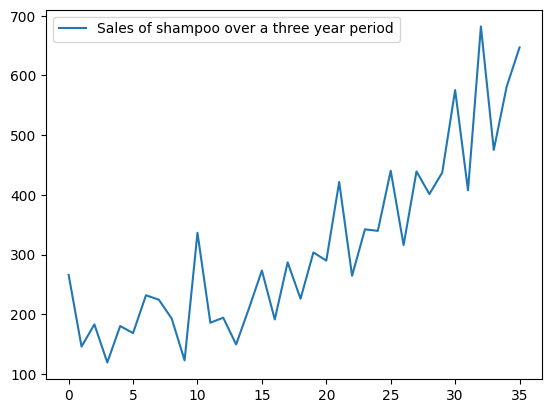

In [65]:
shamp = pd.read_csv(r"..\Datasets\sales-of-shampoo-over-a-three-ye.csv")
shamp.plot()
plt.show()

y = shamp['Sales of shampoo over a three year period']
y_train = y[:-6]
y_test = y[-6:]

In [66]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.272 seconds


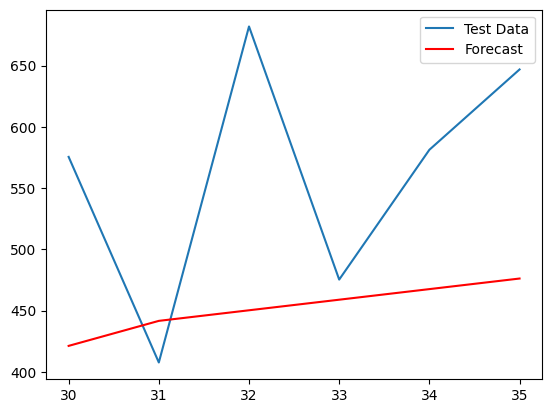

In [67]:
# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

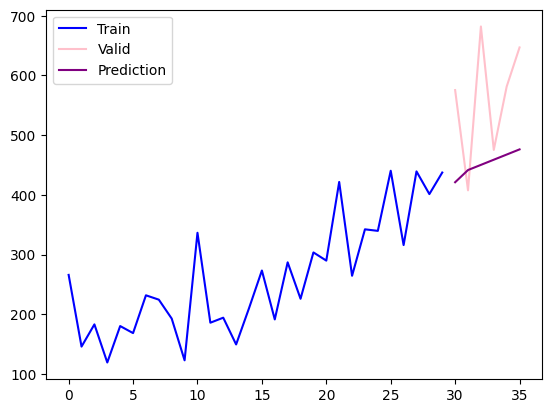

In [68]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [69]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 142.048


#### SARIMA

In [70]:

model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12) # when we add seasonal=True and m, its SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=0.74 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=0.79 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.39 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.26 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.57 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.13 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32

In [71]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

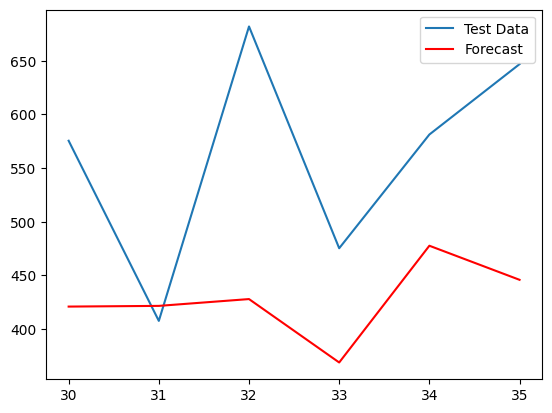

In [72]:
# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

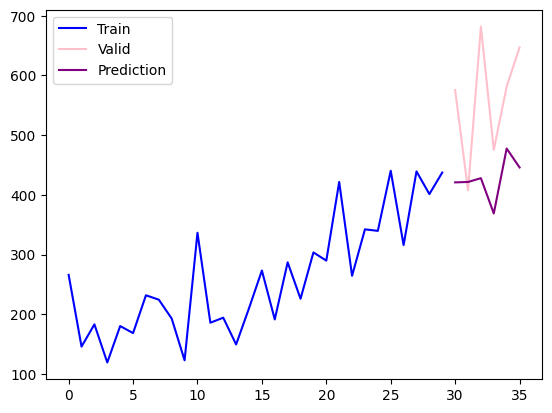

In [73]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [74]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 158.703


### FMAC

In [75]:
fmac = pd.read_csv(r"..\Datasets\FMAC-HPI_24420.csv")

y_train_nsa = fmac['NSA Value'][:-12]
y_test_nsa = fmac['NSA Value'][-12:]

y_train_sa = fmac['SA Value'][:-12]
y_test_sa = fmac['SA Value'][-12:]

In [76]:
model = auto_arima(y_train_nsa, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test_nsa))
forecast = pd.DataFrame(forecast,index = y_test_nsa.index,
                        columns=['NSA Value'])

model2 = auto_arima(y_train_sa, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast2 = model.predict(n_periods=len(y_test_sa))
forecast2 = pd.DataFrame(forecast2,index = y_test_sa.index,
                        columns=['SA Value'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-258.744, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1625.721, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=545.901, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1668.139, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-211.845, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-254.857, Time=0.57 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 10.097 seco

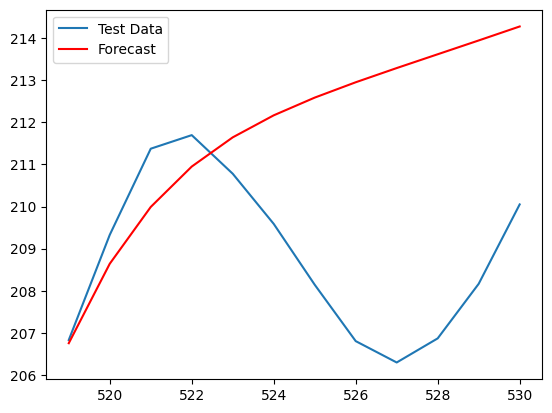

In [77]:
# plot results
plt.plot(y_test_nsa, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

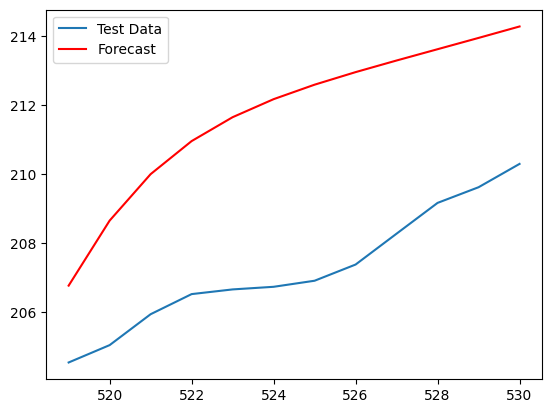

In [78]:
plt.plot(y_test_sa, label='Test Data')
plt.plot(forecast2, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

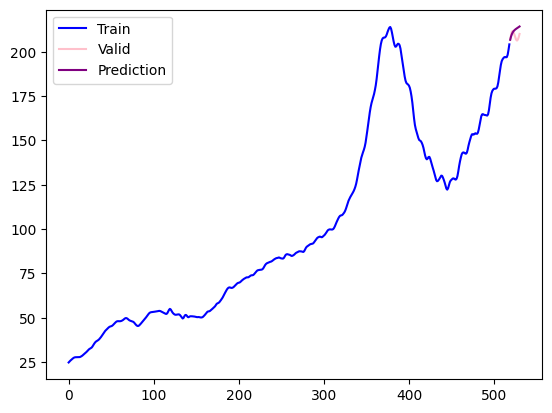

In [79]:
#plot the predictions for validation set
plt.plot(y_train_nsa, label='Train',color="blue")
plt.plot(y_test_nsa, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

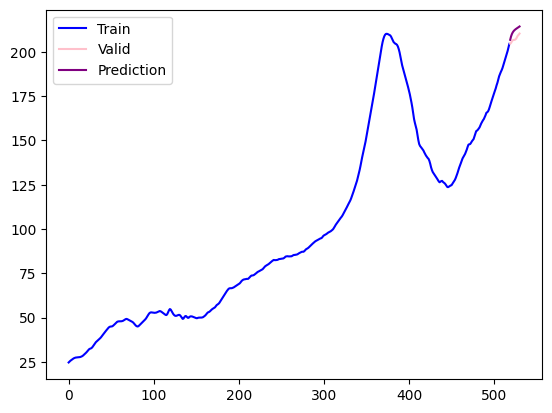

In [80]:
#plot the predictions for validation set
plt.plot(y_train_sa, label='Train',color="blue")
plt.plot(y_test_sa, label='Valid',color="pink")
plt.plot(forecast2, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [81]:
rms = sqrt(mean_squared_error(y_test_nsa, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 4.214


In [82]:
rms2 = sqrt(mean_squared_error(y_test_sa, forecast2))
print('Test RMSE: %.3f' % rms2)

Test RMSE: 4.580


#### SARIMA

In [83]:

model = auto_arima(y_train_nsa, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12) # when we add seasonal=True and m, its SARIMA

model2 = auto_arima(y_train_sa, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-334.128, Time=3.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1625.721, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=301.267, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1668.139, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-306.183, Time=2.73 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-321.800, Time=6.23 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-335.084, Time=6.60 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=5.63 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-329.741, Time=7.45 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=-338.481, Time=6.05 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-337.919, Time=3.25 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : A

In [84]:
forecast = model.predict(n_periods=len(y_test_nsa))
forecast = pd.DataFrame(forecast,index = y_test_nsa.index,
                        columns=['Prediction'])

forecast2 = model.predict(n_periods=len(y_test_sa))
forecast2 = pd.DataFrame(forecast2,index = y_test_sa.index,
                        columns=['Prediction'])

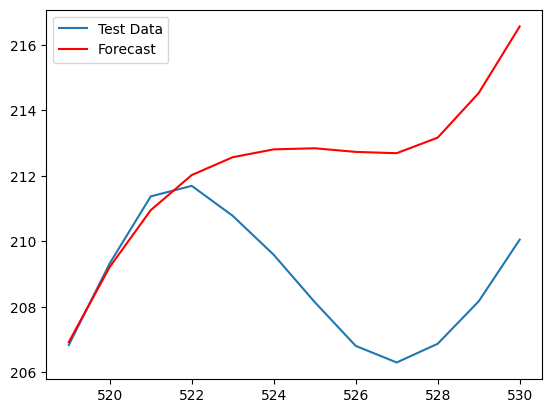

In [85]:
# plot results
plt.plot(y_test_nsa, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

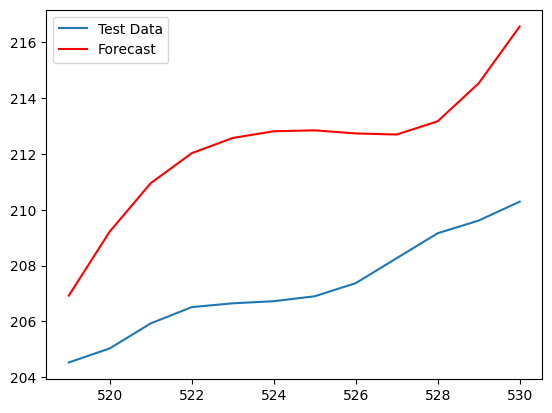

In [86]:
plt.plot(y_test_sa, label='Test Data')
plt.plot(forecast2, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

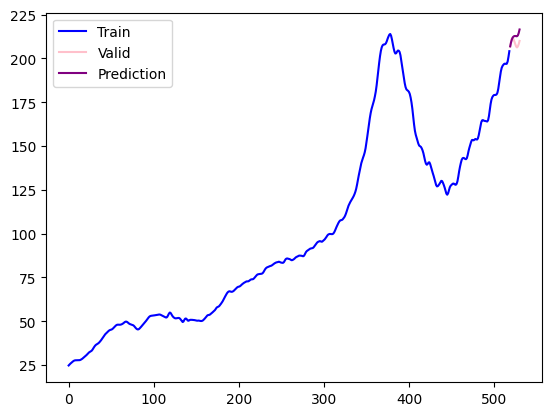

In [87]:
#plot the predictions for validation set
plt.plot(y_train_nsa, label='Train',color="blue")
plt.plot(y_test_nsa, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

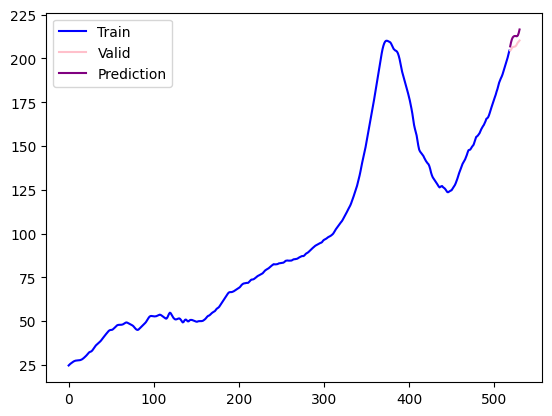

In [88]:
#plot the predictions for validation set
plt.plot(y_train_sa, label='Train',color="blue")
plt.plot(y_test_sa, label='Valid',color="pink")
plt.plot(forecast2, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [89]:
rms = sqrt(mean_squared_error(y_test_nsa, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 4.418


In [90]:
rms2 = sqrt(mean_squared_error(y_test_sa, forecast2))
print('Test RMSE: %.3f' % rms2)

Test RMSE: 5.116
